In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pickle

import scipy.stats as stats

# check out https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.errorbar.html#matplotlib.axes.Axes.errorbar
# for plot of numerous experiments with same settings

exp_path = "experiments/" + "standard_percRange001_010"
if os.path.isfile(
        exp_path + "/simulated_data_shortage_output.csv"):  # check whether we have just a single experiment, or a collection 
    data = [pd.read_csv(exp_path + "/simulated_data_shortage_output.csv")]
else:
    data = [pd.read_csv(exp_path + "/" + path + "/simulated_data_shortage_output.csv") for path in
            os.listdir(exp_path + "/") if not (path.endswith(".csv") or path.endswith(".pickle") or path.endswith(".gitignore"))]

In [2]:
# disc_performances = [[number for number in sample["optic_disc_performance"]] for sample in data]
# cup_performances = [[number for number in sample["optic_cup_performance"]] for sample in data]

disc_performances = [[float(number[7:-1]) for number in sample["optic_disc_performance"]] for sample in data]
cup_performances = [[float(number[7:-1]) for number in sample["optic_cup_performance"]] for sample in data]
percentages = [round(float(perc), 3) for perc in
               data[0]["percentage"]]  # assuming that all experiments were run with the same percentages

In [3]:
disc_performances = np.array(disc_performances)
cup_performances = np.array(cup_performances)

In [4]:
disc_performances

array([[0.8951, 0.9187, 0.9037, 0.9237, 0.9312, 0.9292, 0.9241, 0.9321,
        0.8986, 0.8942],
       [0.8676, 0.9252, 0.9141, 0.9314, 0.9404, 0.9268, 0.9321, 0.9441,
        0.9007, 0.9265],
       [0.9076, 0.915 , 0.8881, 0.9354, 0.9378, 0.9304, 0.895 , 0.9219,
        0.9224, 0.9458],
       [0.8746, 0.9079, 0.9252, 0.9322, 0.9223, 0.9439, 0.9347, 0.9305,
        0.9263, 0.9208],
       [0.907 , 0.9084, 0.9285, 0.9095, 0.923 , 0.9161, 0.9397, 0.9313,
        0.9333, 0.9346],
       [0.8551, 0.9115, 0.915 , 0.9305, 0.9309, 0.9336, 0.9322, 0.9402,
        0.9381, 0.915 ],
       [0.8568, 0.8929, 0.9121, 0.9291, 0.936 , 0.9234, 0.9014, 0.9127,
        0.938 , 0.9   ],
       [0.9054, 0.8795, 0.9272, 0.9302, 0.9156, 0.9108, 0.9268, 0.9406,
        0.9205, 0.9307],
       [0.8664, 0.8729, 0.9156, 0.9246, 0.9387, 0.9239, 0.9351, 0.8358,
        0.9034, 0.9251],
       [0.9204, 0.8892, 0.9201, 0.9248, 0.9382, 0.9395, 0.9245, 0.9185,
        0.9113, 0.9315],
       [0.8827, 0.9067, 0.9316

In [5]:
cup_performances

array([[0.3085, 0.4756, 0.3143, 0.5724, 0.3496, 0.3769, 0.7042, 0.6996,
        0.7658, 0.7527],
       [0.1685, 0.4706, 0.345 , 0.5631, 0.6989, 0.3658, 0.7625, 0.6871,
        0.7569, 0.7917],
       [0.413 , 0.3459, 0.4296, 0.3668, 0.631 , 0.6876, 0.6745, 0.7139,
        0.769 , 0.7844],
       [0.3258, 0.3454, 0.5455, 0.3619, 0.7259, 0.4971, 0.6097, 0.768 ,
        0.7771, 0.7808],
       [0.4095, 0.6441, 0.4451, 0.3333, 0.6947, 0.3821, 0.7333, 0.723 ,
        0.7639, 0.7485],
       [0.5777, 0.417 , 0.3177, 0.5397, 0.7397, 0.3404, 0.3454, 0.7575,
        0.625 , 0.6037],
       [0.3265, 0.5613, 0.502 , 0.5915, 0.6316, 0.6577, 0.69  , 0.5371,
        0.7891, 0.7311],
       [0.3244, 0.3569, 0.3426, 0.345 , 0.6216, 0.7451, 0.6852, 0.6962,
        0.7798, 0.7952],
       [0.3121, 0.5581, 0.3423, 0.7283, 0.692 , 0.6881, 0.786 , 0.6818,
        0.7207, 0.7162],
       [0.3409, 0.6137, 0.3853, 0.3499, 0.6453, 0.3572, 0.7324, 0.7539,
        0.7545, 0.7958],
       [0.3541, 0.5469, 0.3682

In [6]:
summary_frame = pd.DataFrame(
    np.array([percentages, disc_performances.mean(axis=0), disc_performances.std(axis=0), cup_performances.mean(axis=0),
              cup_performances.std(axis=0)]).T,
    columns=["percentages", "disc_performance_mean", "disc_performance_std", "cup_performance_mean",
             "cup_performance_std"]
)
summary_frame.to_csv(exp_path + "/summary.csv")

In [7]:
disc_performances.mean(axis=0)

array([0.88643333, 0.90061667, 0.91706667, 0.92720833, 0.92865   ,
       0.92806667, 0.92456667, 0.922125  , 0.92110833, 0.92155   ])

In [8]:
cup_performances.mean(axis=0)

array([0.34766667, 0.48266667, 0.3894    , 0.47694167, 0.6417    ,
       0.51783333, 0.68769167, 0.70515833, 0.75195   , 0.74991667])

In [9]:
whole_data = {"percentages": percentages, "disc_performance": disc_performances, "cup_performance": cup_performances}
with open(exp_path + "/whole_data.pickle", "wb") as handle:
    pickle.dump(whole_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

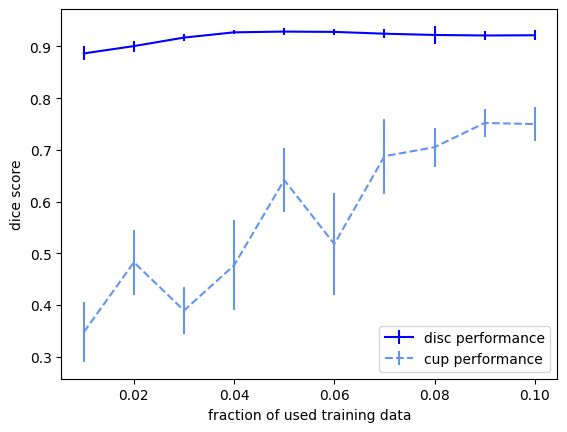

In [10]:
alpha = 0.05  # alpha level for confidence intervals

plt.errorbar(percentages,
             disc_performances.mean(axis=0),
             yerr=stats.t.ppf(1 - alpha / 2, df=(len(data) - 1)) / (len(data) ** (1 / 2)) * disc_performances.std(
                 axis=0),
             linestyle="-", color="b", label="disc performance")
plt.errorbar(percentages,
             cup_performances.mean(axis=0),
             yerr=stats.t.ppf(1 - alpha / 2, df=(len(data) - 1)) / (len(data) ** (1 / 2)) * cup_performances.std(
                 axis=0),
             linestyle="--", color="cornflowerblue", label="cup performance")
# plt.plot(percentages, disc_performance, linestyle="-", color="b", label="disc performance")
# plt.plot(percentages, cup_performance, linestyle="--", color="b", label="cup performance")
plt.xlabel("fraction of used training data")
plt.ylabel("dice score")
plt.legend()

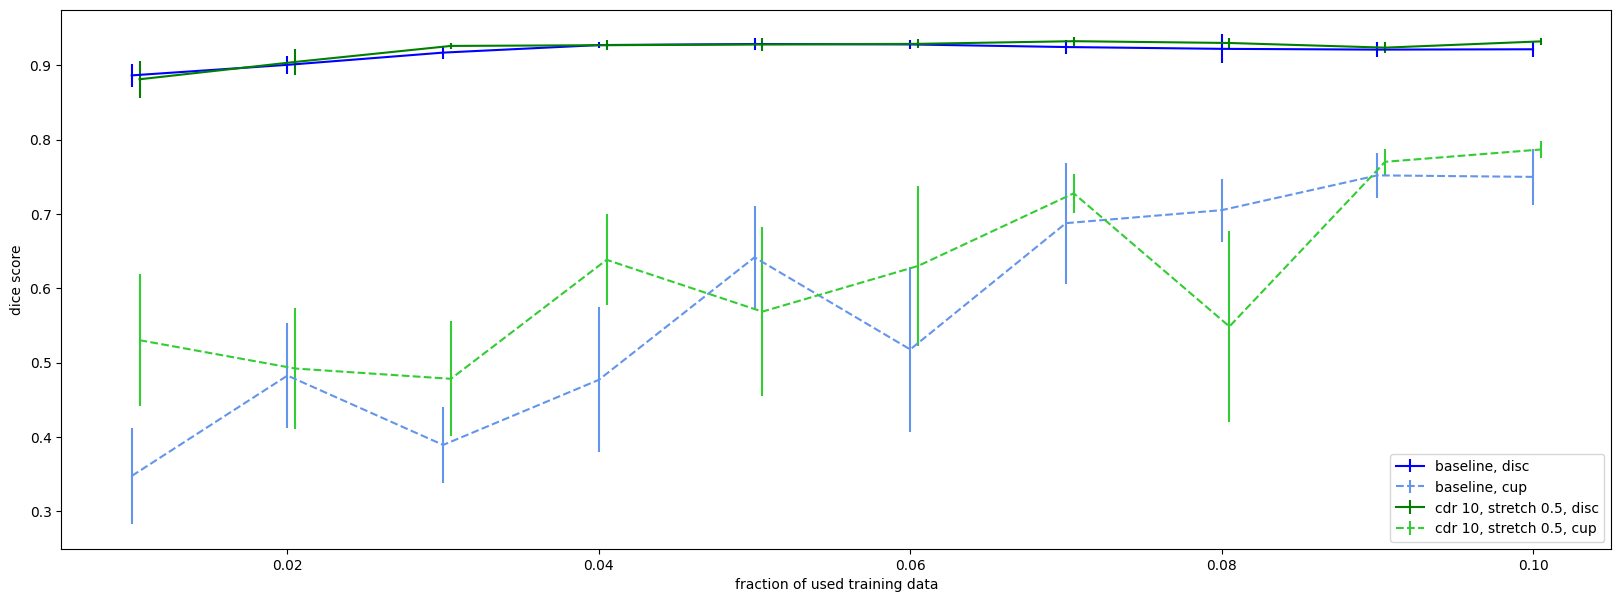

In [11]:
experiments_of_interest = ["standard_percRange001_010", "cdr10_stretch05_percRange001_010"]
experiments_labels = ["baseline", "cdr 10, stretch 0.5", "topological loss, very narrow"]
# experiments_colors = [("b", "cornflowerblue"), ("green", "limegreen")]
experiments_colors = [("b", "cornflowerblue"), ("green", "limegreen"), ("orangered", "coral")]
exp_paths = ["experiments/" + name for name in experiments_of_interest]

plt.rcParams["figure.figsize"] = (20,7)

for i in range(len(experiments_of_interest)):
    data = pd.read_csv(exp_paths[i] + "/summary.csv")
    plt.errorbar(data["percentages"]+i/2000,
                 data["disc_performance_mean"],
                 yerr=stats.t.ppf(1 - alpha / 2, df=(len(data) - 1)) / (len(data) ** (1 / 2)) * data["disc_performance_std"],
                 linestyle="-", color=experiments_colors[i][0], label=experiments_labels[i] + ", disc")
    plt.errorbar(data["percentages"]+i/2000,
                 data["cup_performance_mean"],
                 yerr=stats.t.ppf(1 - alpha / 2, df=(len(data) - 1)) / (len(data) ** (1 / 2)) * data["cup_performance_std"],
                 linestyle="--", color=experiments_colors[i][1], label=experiments_labels[i] + ", cup")

plt.xlabel("fraction of used training data")
plt.ylabel("dice score")
plt.legend(loc=4) # loc 4 ... lower right
plt.show()

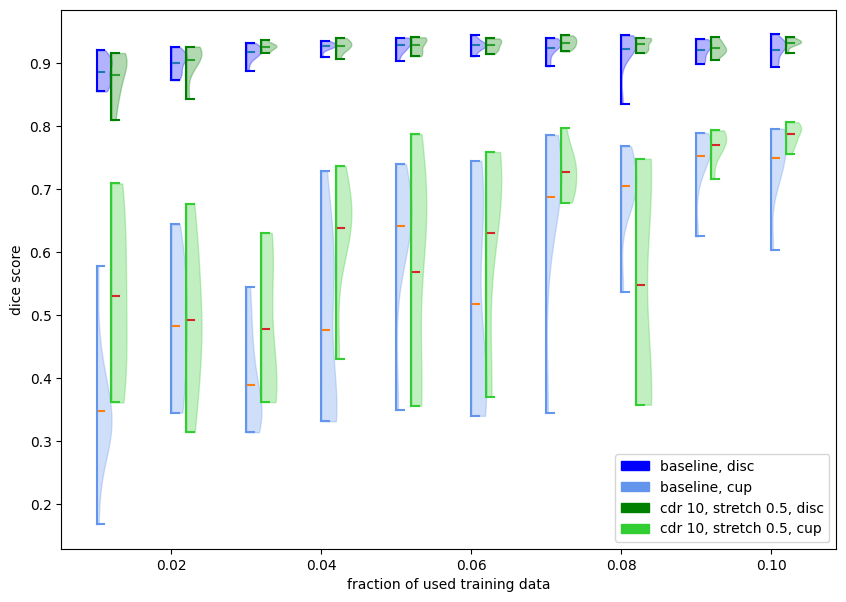

In [12]:
patches = []
labels = []
plt.rcParams["figure.figsize"] = (10,7)
width = 0.004 # widths depends on the percentage area we look at
shift_factor = 500

for i in range(len(experiments_of_interest)):
    with open(exp_paths[i] + "/whole_data.pickle", "rb") as handle:
        data = pickle.load(handle)
    violin = plt.violinplot(data["disc_performance"],
                            positions = [p + i/shift_factor for p in data["percentages"]],
                            widths=width,
                            showmeans=True,
                            side="high") 
    for pc in violin['bodies']:
        pc.set_facecolor(experiments_colors[i][0])
        pc.set_edgecolor(experiments_colors[i][0])
    for partname in ('cbars','cmins','cmaxes'):
        vp = violin[partname]
        vp.set_edgecolor(experiments_colors[i][0])
    patches.append(mpatches.Patch(color=experiments_colors[i][0]))
    labels.append(experiments_labels[i] + ", disc")
    
    violin = plt.violinplot(data["cup_performance"],
                            positions = [p + i/shift_factor for p in data["percentages"]],
                            widths=width,
                            showmeans=True,
                            side="high") 
    for pc in violin['bodies']:
        pc.set_facecolor(experiments_colors[i][1])
        pc.set_edgecolor(experiments_colors[i][1])
    for partname in ('cbars','cmins','cmaxes'):
        vp = violin[partname]
        vp.set_edgecolor(experiments_colors[i][1])
    patches.append(mpatches.Patch(color=experiments_colors[i][1]))
    labels.append(experiments_labels[i] + ", cup")


plt.xlabel("fraction of used training data")
plt.ylabel("dice score")
plt.legend(patches, labels, loc=4) # loc 4 ... lower right
plt.savefig("comparison.png")
plt.show()